In [8]:
from pathlib import Path
import numpy as np
from halo import read_halocat, read_halomemcat, read_haloqcat, Halos

WD = Path.cwd() / "Run_multi" / "Run1"
step_numbers_of_interest = np.array([28, 64, 91, 127, 189])
step_numbers = np.array([19, 28, 37, 46, 55, 64, 73, 82, 91, 100, 109, 118, 127, 136, 145, 154, 163, 172, 182, 189])


In [9]:

halos_list = []
for i in range(len(step_numbers)):
    step_number = step_numbers[i]
    halocatpath = WD / f"FoF_halo_cat.{step_number:05d}"
    haloqcatpath = WD / f"FoFHaloQuantities{step_number:05d}.bin"
    halomemcatpath = WD / f"FoF_member_particle.{step_number:05d}"

    halocat, snapshot_props = read_halocat(halocatpath)
    haloqcat = read_haloqcat(haloqcatpath)
    halomemcat = read_halomemcat(halomemcatpath)
    
    initial = False if i > 0 else True
    
    halos = Halos(halocat, haloqcat, halomemcat, snapshot_props, initial=initial)
    halos_list.append(halos)

In [10]:
halos = halos_list[-1]
imax = np.argmax(halos.mass)
pos = halos.position[imax]

ptls = halos.member_particles[halos.memptlhid == halos.hid[imax]]
mbp = ptls[ptls['indx']==halos.mbp[imax]]
xptls, yptls, zptls = ptls['x'], ptls['y'], ptls['z']

Text(0, 0.5, 'z [Mpc/h]')

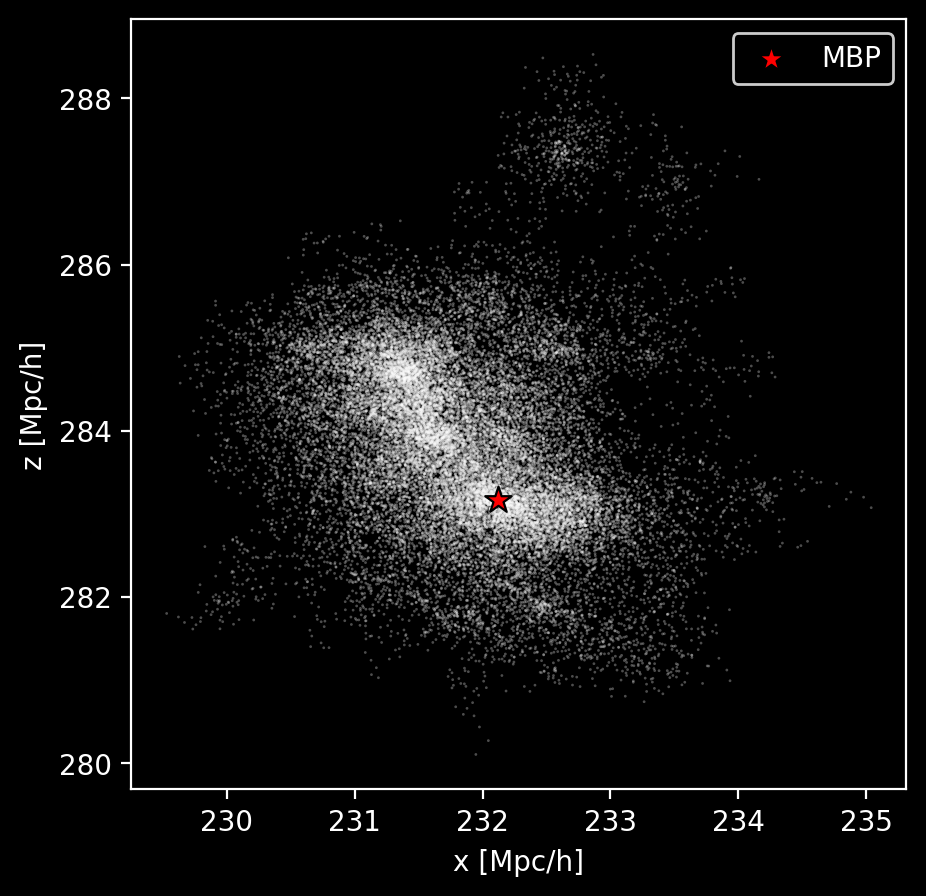

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 5), facecolor='k', dpi=200)
ax = fig.add_subplot(111)
ax.scatter(xptls, zptls, s=1, c='w', alpha=0.3, ec='none')
ax.set_facecolor('k')
ax.scatter(mbp['x'], mbp['z'], s=100, c='r', marker="*", label='MBP', ec='k', lw=0.8)
legend = ax.legend(labelcolor='w')
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('white')
ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.tick_params(axis='both', colors='w')
ax.set_xlabel('x [Mpc/h]')
ax.set_ylabel('z [Mpc/h]')

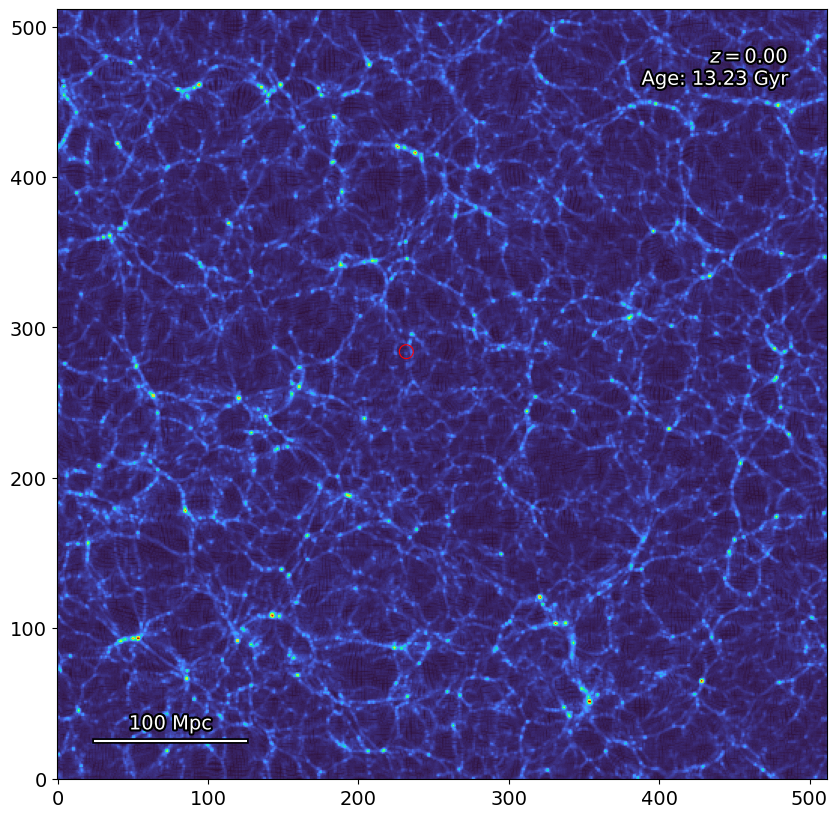

In [12]:
RUNDIR = WD
# fetching the file paths of the xz slices
xzslices = list(RUNDIR.glob('xzslice*'))
xzslices.sort()

filepath = xzslices[-1]
# read nx and ny values assuming they are stored as integers
nx, ny = np.fromfile(filepath, dtype=np.int32, count=2)

# now read the density array, assuming it's a flat array of floats with size nx*ny
den = np.fromfile(filepath, dtype=np.float32, count=nx*ny)

# optionally, reshape density to match the 2D structure if needed
den = den.reshape(ny, nx)

from astropy.visualization import ZScaleInterval
from matplotlib.colors import PowerNorm
from matplotlib.patheffects import withStroke
from astropy.cosmology import FlatLambdaCDM, LambdaCDM

cosmo = FlatLambdaCDM(H0=72, Om0=0.304)
cosmo = LambdaCDM(H0=72, Om0=0.304, Ode0=0.74)
age = cosmo.age(0).value


plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 18

cmap = "YlGnBu_r"
# cmap = "Purples_r"
cmap = "turbo"

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(den+3, origin='lower', cmap=cmap, norm=PowerNorm(gamma=0.5))
path_effects = [withStroke(linewidth=3, foreground='black')]
path_effects_line = [withStroke(linewidth=4, foreground='black')]
ztxt = ax.text(0.95, 0.95, f'$z={0:.2f}$\n Age: {age:.2f} Gyr', color='w', transform=ax.transAxes, ha='right', va='top',
               path_effects=path_effects)
ax.text(75, 30, '100 Mpc', color='w', ha='center', va='bottom', path_effects=path_effects)
ax.plot([25, 125], [25, 25], color='w', lw=1.5, path_effects=path_effects_line)
ax.scatter(pos['x'], pos['z'], s=100, marker="o", label='Halo', ec='r', lw=0.8, fc='none')
# ax.set_axis_off()


In [13]:
from astropy.table import Table

names = ['mass', 'cx', 'cy', 'cz', 'indx', 'mpeak', 'isubhalo', 'pad1', 'spin', 'sigv', 'rotL', 'radius', 'q', 's',
         'v00', 'v01', 'v02', 'v10', 'v11', 'v12', 'v20', 'v21', 'v22', 'ang0', 'ang1', 'ang2', 'pvx', 'pvy', 'pvz', 'Es']

subhalopath = WD / "b00189halomass.dat"

psbtab = Table.read(subhalopath, format='ascii.csv', names=names, delimiter=' ')

In [14]:
psbtab

mass,cx,cy,cz,indx,mpeak,isubhalo,pad1,spin,sigv,rotL,radius,q,s,v00,v01,v02,v10,v11,v12,v20,v21,v22,ang0,ang1,ang2,pvx,pvy,pvz,Es
float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
2405430000000.0,57.433399,123.329582,126.316582,1,1,0,0.0166531,122.403,4.90695e+20,inf,0.482927,0.319855,0.33046,-0.0807517,0.940359,0.00330983,0.996426,0.0844032,-0.943814,-0.0247794,0.329546,0.71812,-0.677609,-0.158583,313.765,-62.4954,-171.338,0,--
3107020000000.0,30.517414,13.891833,126.290619,2,1,0,0.0606514,126.512,2.5429e+21,inf,0.752588,0.59209,-0.560938,0.0505729,0.826312,0.766394,-0.345694,0.541421,0.313032,0.936983,0.155154,-0.212956,-0.279646,-0.936188,53.4392,283.971,-79.1736,0,--
2104750000000.0,54.94268,165.327621,126.135506,3,1,0,0.0851488,104.194,1.88047e+21,inf,0.731758,0.349149,0.410559,-0.156052,0.898381,0.888738,0.288829,-0.355981,-0.203927,0.944577,0.257271,-0.265062,-0.959312,0.0972715,440.006,-318.805,-28.6352,0,--
17238900000000.0,11.234062,388.888855,155.964905,4,1,0,0.102886,274.777,7.83488e+22,inf,0.706103,0.447751,0.976626,0.0696498,0.203349,-0.128156,0.948183,0.290731,-0.172563,-0.309996,0.934946,-0.0189582,0.287329,-0.957644,-184.699,-139.374,-378.555,0,--
3006790000000.0,9.676201,384.222137,156.068817,5,1,0,0.0620674,139.933,2.71745e+21,inf,0.662568,0.342574,0.99036,0.0973203,0.0985664,-0.0414659,-0.470657,0.881342,0.132163,-0.876933,-0.462084,0.167309,-0.983778,-0.0647204,-222.565,259.37,-667.53,0,--
52418400000000.0,13.125734,390.348083,155.922668,6,1,0,0.0997881,441.685,3.99616e+23,inf,0.606332,0.458533,-0.126897,0.988536,-0.0818123,0.538009,0.137886,0.831585,0.833333,0.06151,-0.549339,0.977047,-0.00317134,-0.213002,-626.216,-150.955,-185.66,0,--
2605890000000.0,2.380948,428.592163,126.931618,7,1,0,0.0587729,107.462,1.72037e+21,inf,0.779341,0.555075,0.417129,0.897011,0.146204,0.25203,-0.268724,0.92966,0.873204,-0.35094,-0.338166,-0.650491,0.474743,-0.592858,-172.123,16.8925,924.4,0,--
2405430000000.0,21.334538,409.871887,126.440056,8,1,0,0.0341436,111.429,8.80064e+20,inf,0.924343,0.518296,0.566886,0.29817,0.767942,0.715646,0.28348,-0.63835,-0.408033,0.911446,-0.0526839,0.632535,-0.736672,-0.239194,-153.943,-142.882,539.847,0,--
34277400000000.0,29.603466,304.286011,126.728592,9,1,0,0.0266361,362.289,5.06194e+22,inf,0.691822,0.580828,0.496151,-0.5618,0.661978,-0.661722,0.24893,0.707218,-0.562101,-0.788933,-0.248249,0.316901,0.547428,0.77453,-375.425,10.0547,0.774205,0,--


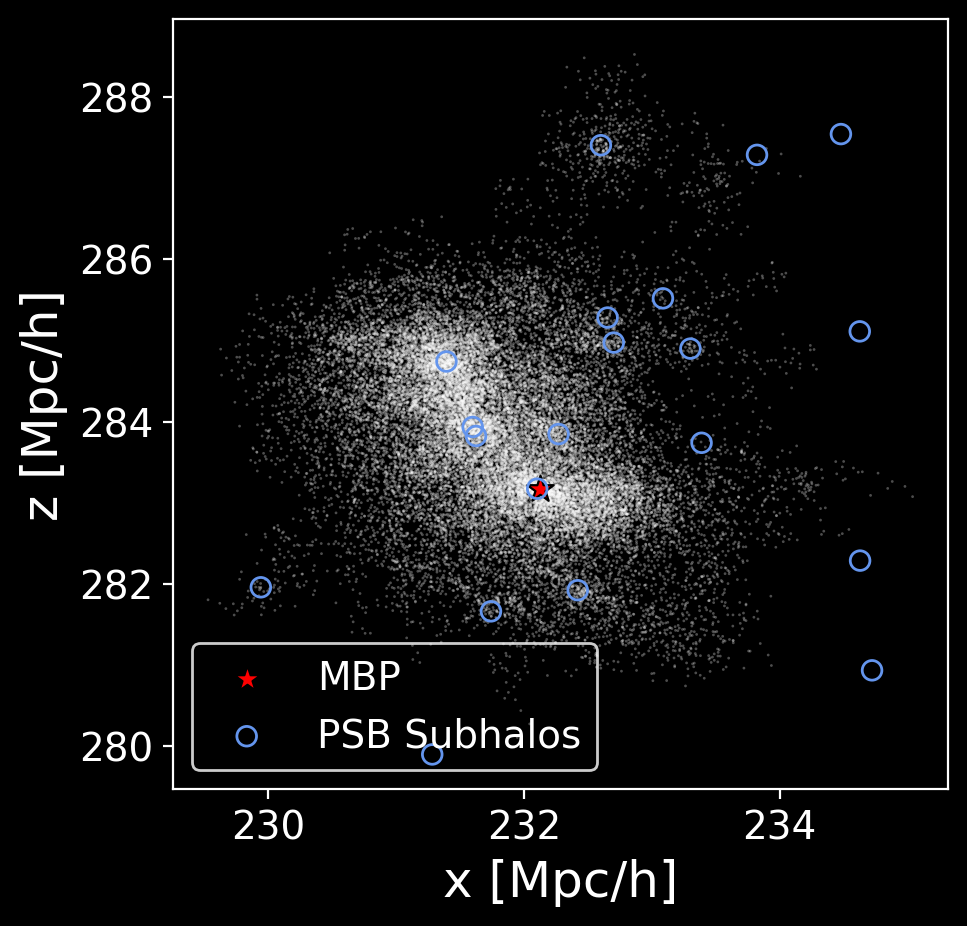

In [15]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 5), facecolor='k', dpi=200)
ax = fig.add_subplot(111)
ax.scatter(xptls, zptls, s=1, c='w', alpha=0.3, ec='none')
ax.set_facecolor('k')
ax.scatter(mbp['x'], mbp['z'], s=100, c='r', marker="*", label='MBP', ec='k', lw=0.8)
ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.tick_params(axis='both', colors='w')
ax.set_xlabel('x [Mpc/h]')
ax.set_ylabel('z [Mpc/h]')
xlim, zlim = ax.get_xlim(), ax.get_ylim()
ylim = yptls.min(), yptls.max()
psbcx, psbcy, psbcz = psbtab['cx'], psbtab['cy'], psbtab['cz']
mask = (psbcx > xlim[0]) & (psbcx < xlim[1]) & (psbcz > zlim[0]) & (psbcz < zlim[-1]) & (psbcy > ylim[0]) & (psbcy < ylim[-1])
psbcx, psbcz = psbcx[mask], psbcz[mask]
ax.scatter(psbcx, psbcz, s=50, ec='cornflowerblue', fc='none', label='PSB Subhalos')
legend = ax.legend(labelcolor='w')
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('white')

In [16]:
from tqdm import trange
for i in trange(1, len(halos_list)):
    _ = halos_list[i].match_halos_previous_timestep(halos_list[i-1])

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:38<00:00,  2.01s/it]


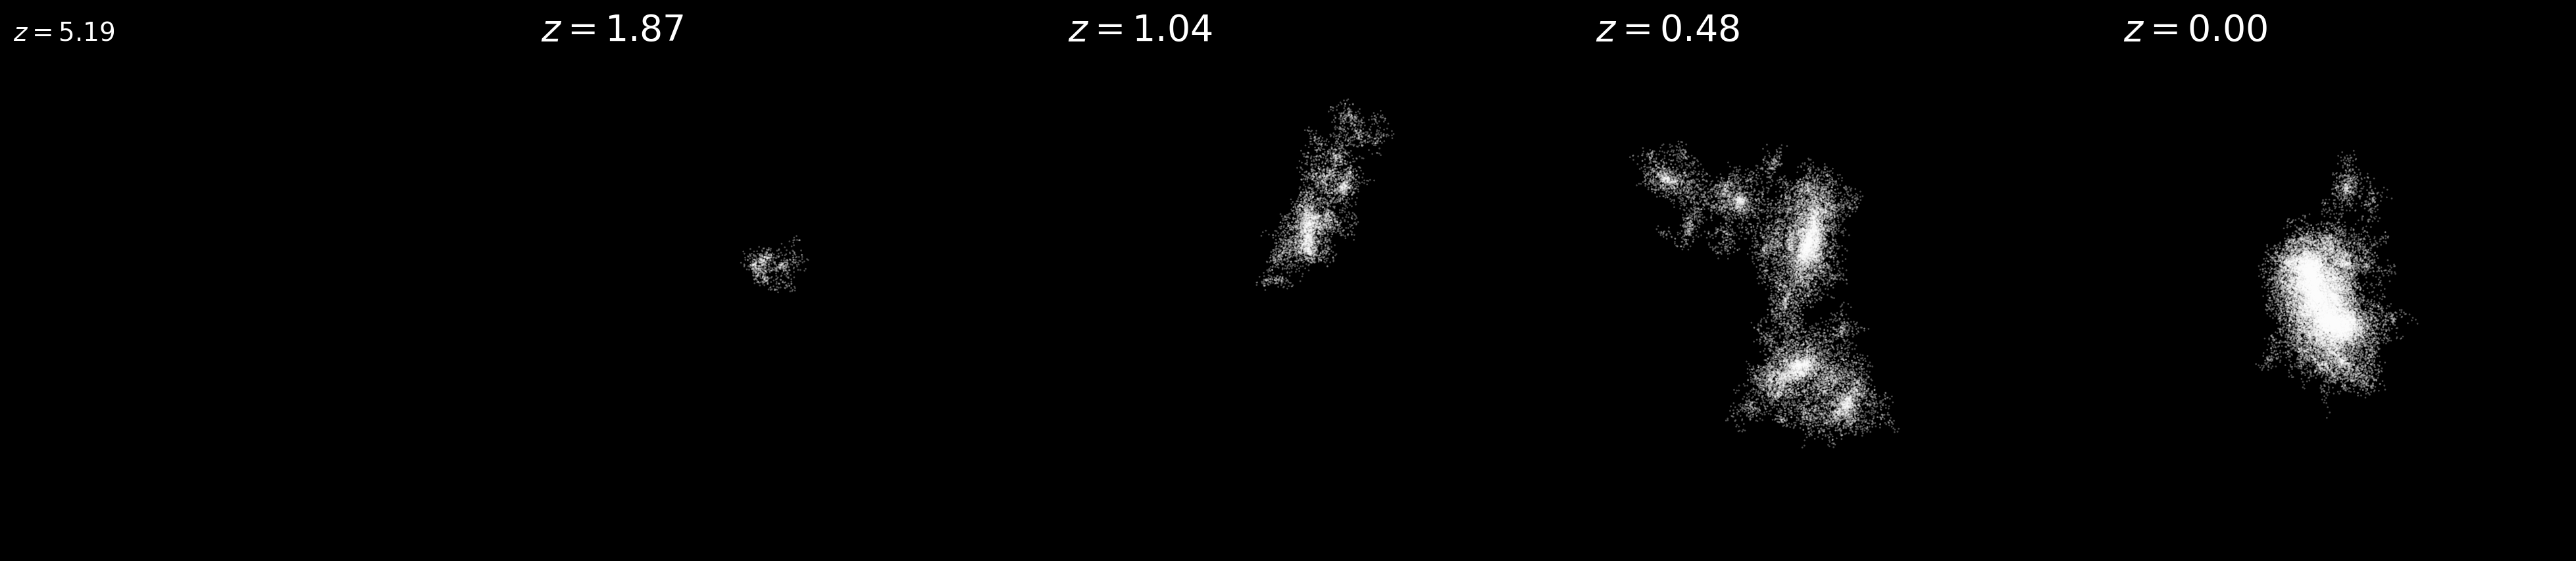

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5), facecolor='k', dpi=200)
j = 4
mass, redshift = [], []
for i in range(len(step_numbers)-1, -1, -1):
    halos = halos_list[i]
    if i == len(step_numbers)-1:
        imax = np.argmax(halos.mass)
        hid = halos.hid[imax]
        mass.append(halos.mass[imax])
        redshift.append(halos.redshift)
    else:
        try:
            halos_after = halos_list[i+1]
            imatch = halos_after.hid_matched_now == hid
            matching_hids = halos_after.hid_matched_prev[imatch]
            hid = matching_hids[np.argmax(halos.mass[matching_hids])]
            imax = halos.hid == hid
            mass.append(halos.mass[imax][0])
            redshift.append(halos.redshift)
        except:
            hid=None

    if step_numbers[i] in step_numbers_of_interest:
        ax = axes[j]
        j = j - 1
        if hid==None:
            ax.set_axis_off()
            ax.text(0,1, f"$z = {halos.redshift:.2f}$", color='w', transform=ax.transAxes)
        else:
            pos = halos.position[imax]
            ptls = halos.member_particles[halos.memptlhid == halos.hid[imax]]
            mbp = ptls[ptls['indx']==halos.mbp[imax]]
            xptls, zptls = ptls['x'], ptls['z']

            ax.scatter(xptls, zptls, s=1, c='w', alpha=0.3, ec='none')
            ax.set_facecolor('k')
            ax.set_axis_off()
            ax.text(0,1, f"$z = {halos.redshift:.2f}$", color='w', transform=ax.transAxes, fontsize=20)
            if j == 2:
                xlim = ax.get_xlim()
                ylim = ax.get_ylim()
    
for ax in axes:
    # ax.set_xlim(xlim)
    ax.set_xlim(225, 240)
    ax.set_ylim(276, 292)
    

In [35]:
masses, redshifts = [], []
for j in trange(200):
    mass, redshift = [], []
    for i in range(len(step_numbers)-1, -1, -1):
        halos = halos_list[i]
        if i == len(step_numbers)-1:
            imax = np.argsort(halos.mass)[-j]
            hid = halos.hid[imax]
            mass.append(halos.mass[imax])
            redshift.append(halos.redshift)
        else:
            try:
                halos_after = halos_list[i+1]
                imatch = halos_after.hid_matched_now == hid
                matching_hids = halos_after.hid_matched_prev[imatch]
                hid = matching_hids[np.argmax(halos.mass[matching_hids])]
                imax = halos.hid == hid
                mass.append(halos.mass[imax][0])
                redshift.append(halos.redshift)
            except:
                hid=None
    masses.append(mass)
    redshifts.append(redshift)
        

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:09<00:00, 22.15it/s]


In [52]:
ut

array([0.        , 0.03783786, 0.09714282, 0.15662646, 0.22292995,
       0.29729724, 0.38129497, 0.47692311, 0.58677685, 0.71428573,
       0.86407769, 1.04255319, 1.25882363, 1.52631569, 1.86567163,
       2.31034493, 2.91836739, 3.80000019, 5.1935482 ])

100%|██████████| 200/200 [00:00<00:00, 668.31it/s]


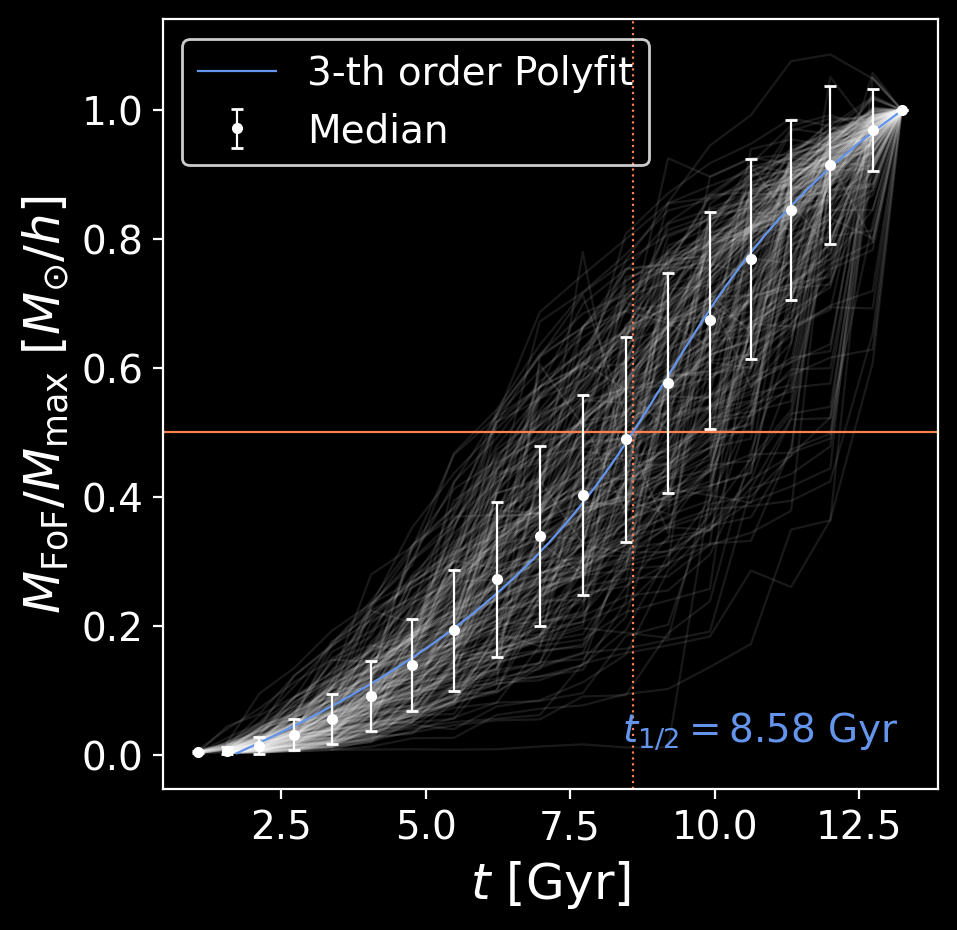

In [62]:
from scipy.interpolate import interp1d
fig = plt.figure(figsize=(5, 5), facecolor='k', dpi=200)
ax = fig.add_subplot(111)

mm = np.linspace(mass[0], mass[-1], 1000)
norm_masses = []
for j in trange(200):
    mass, redshift = masses[j], redshifts[j]
    mass = mass/mass[0]
    norm_masses.append(mass)
    t = cosmo.age(redshift)
    ax.plot(t, mass, c='w', lw=0.8, alpha=0.1)
#     f = interp1d(mass, t, kind='quadratic')
#     tt = f(mm)
#     thalf = f(mass[0]/2)

mass = np.concatenate(norm_masses)
t = cosmo.age(np.concatenate(redshifts))
tsort = np.argsort(t)
t, mass = t[tsort], mass[tsort]
ut = np.unique(t)
mmed = np.zeros(len(ut))
msig = np.zeros(len(ut))
for i in range(len(ut)):
    mask = t == ut[i]
    mmed[i] = np.median(mass[mask])
    msig[i] = np.std(mass[mask])
    
p = np.polyfit(mmed, ut, 3)
f = np.poly1d(p)
thalf = f(1/2)
tt = f(mm)

ax.errorbar(ut, mmed, yerr=msig, c='w', fmt='o', ms=3, lw=0.8, zorder=6, label='Median', capsize=2)

ax.set_facecolor('k')
ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.tick_params(axis='both', colors='w')
ax.set_xlabel('$t$ [Gyr]')
ax.set_ylabel(r'$M_{\mathrm{FoF}}/M_{\rm max}$ [$M_{\odot}/h$]')
ax.axhline(1/2, c='coral', ls='-', lw=0.8)
ax.plot(tt, mm, c='cornflowerblue', ls='-', lw=0.8, zorder=5, label='3-th order Polyfit')
ax.axvline(thalf, c='coral', ls=':', lw=0.8)
ax.text(0.95, 0.05, f"$t_{{1/2}} = {thalf:.2f}$ Gyr", color='cornflowerblue',
        transform=ax.transAxes, ha='right', va='bottom')
legend = ax.legend(labelcolor='w')
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('white')